# Importar bibliotecas

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.datasets import load_titanic
from feature_engine.encoding import OneHotEncoder

# Ler o arquivo

In [2]:
from base import *

glass_list = loadData('glass.csv') #Recebo os dados do arquivo csv
glass_list


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Transpor a entrada

### Separação de dados de treino e teste

Aqui foi utilizado a função `train_test_split` para realizar a separação dos dados para treinamento e teste, além de garantir a generalização de **70% 30%**

In [3]:
y = glass_list['Type']
X = glass_list.drop('Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [4]:
X_train = X_train.__array__().T #Transponho a matriz de dados para deixar no formato de entrada coluna
X_test = X_test.__array__().T #Transponho a matriz de dados para deixar no formato de entrada coluna

### Normalizar os valores de entrada

Quando valores de entradas inseridos sem ser normalizados, o valor retornado da função de **ativação sigmoid** tendia a um valor **muito pequeno** e o seguinte erro era apresentado: `OverflowError: math range error`

Portanto, o seguinte trecho se fez nescessário:

In [5]:
#scaler = StandardScaler()
X_train_normalized = preprocessing.normalize(X_train) #scaler.fit_transform(X_train)
X_test_normalized = preprocessing.normalize(X_test) #scaler.fit_transform(X_test)

# Converter os rotulos

In [6]:
# D_glass = pd.DataFrame(glass_list.Type)
# # Cria o OneHotEncoder e ajusta aos rótulos
# ohe = OneHotEncoder(
#     top_categories=6,
#     variables=['Type'],
#     ignore_format=True,
#     )
# D_glass = ohe.fit_transform(D_glass)
# D_glass = D_glass[sorted(D_glass.columns)]
# n = len(D_glass.columns)

# D_glass

`y_train` formato one hot encoder

In [7]:
ohe = OneHotEncoder(
    top_categories=6,
    variables=['Type'],
    ignore_format=True,
    )

y_train = ohe.fit_transform(pd.DataFrame(y_train))
y_train = y_train[sorted(y_train.columns)]

n = len(y_train.columns)

y_train

,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7
180,0,0,0,0,1,0
43,1,0,0,0,0,0
62,1,0,0,0,0,0
204,0,0,0,0,0,1
192,0,0,0,0,0,1
...,...,...,...,...,...,...
144,0,1,0,0,0,0
118,0,1,0,0,0,0
189,0,0,0,0,0,1
206,0,0,0,0,0,1


`Y_test` formato one hot encoder

In [8]:
y_test = ohe.fit_transform(pd.DataFrame(y_test))
y_test = y_test[sorted(y_test.columns)]

y_test

,Type_1,Type_2,Type_3,Type_5,Type_6,Type_7
21,1,0,0,0,0,0
54,1,0,0,0,0,0
84,0,1,0,0,0,0
102,0,1,0,0,0,0
26,1,0,0,0,0,0
...,...,...,...,...,...,...
1,1,0,0,0,0,0
194,0,0,0,0,0,1
95,0,1,0,0,0,0
77,0,1,0,0,0,0


# Criar o Perceptron

### Teste unitario 

In [9]:
p = Perceptron(4, 0.1, [[0, 0, 1, 1], [0, 1, 0, 1]], [0, 1, 1, 1], 1)
p.start_training()
p.start_test([[0, 0, 1, 1, 0], [1, 0, 1, 0, 0]], [1, 0, 1, 1, 0])

Pesos:

     0    1
0  0.1  0.1

Bias:

     0
0 -0.1
Acuracia: 100.0%


100.0

### Treinamento Degrau

In [10]:
alpha = 0.1  # fator de apredizagem
max_it = 8  # Maximo de iterações

glass_perceptron = Perceptron(max_it, alpha, X_train_normalized, y_train.__array__(), n)
glass_perceptron.start_training()

Pesos:

          0         1         2         3         4         5         6  \
0 -0.007755 -0.025378  0.221076 -0.212176 -0.004475 -0.040708 -0.028720   
1  0.002544 -0.084380 -0.038745 -0.032208 -0.007944  0.110462  0.179658   
2 -0.008588 -0.009711  0.068715 -0.060276 -0.009552 -0.032178 -0.012536   
3 -0.008258 -0.001905 -0.233415  0.187227 -0.010507  0.297481  0.014431   
4 -0.008846  0.008369 -0.028485  0.078397 -0.006321 -0.075693 -0.041709   
5 -0.009394  0.042992 -0.239868  0.219596 -0.000795 -0.049238 -0.114442   

          7         8  
0 -0.185367  0.004811  
1  0.020068  0.226129  
2 -0.042811  0.112721  
3  0.013230  0.237813  
4 -0.081758 -0.032991  
5  0.429154 -0.208258  

Bias:

     0
0 -0.1
1  0.0
2 -0.1
3 -0.1
4 -0.1
5 -0.1


### Treinamento Sigmoid

In [11]:
glass_sigmoid = Perceptron(max_it, alpha, X_train_normalized, y_train.__array__(), n)
glass_sigmoid.start_training(True)

Pesos:

          0         1         2         3         4         5         6  \
0 -0.008931 -0.005588  0.691417 -0.330094 -0.006119  0.019112 -0.178546   
1  0.002754 -0.086034  0.054297 -0.075977 -0.009864  0.133785  0.175983   
2 -0.008681 -0.011304  0.242892 -0.086408 -0.011687 -0.059064 -0.037368   
3 -0.008051 -0.006010 -0.256258  0.161256 -0.010347  0.255477  0.028293   
4 -0.009010  0.019563 -0.306397  0.118724 -0.003176 -0.245327  0.014858   
5 -0.008890  0.045259 -0.449443  0.171096 -0.000844 -0.103983 -0.036985   

          7         8  
0 -0.253598  0.042614  
1 -0.010703  0.043301  
2 -0.200084  0.167019  
3  0.134232  0.148461  
4 -0.103461 -0.115470  
5  0.433614 -0.285926  

Bias:

     0
0 -0.1
1  0.0
2 -0.1
3 -0.1
4 -0.1
5 -0.1


# Fase de Testes

### Teste Degrau

In [12]:
glass_perceptron.start_test(X_test_normalized, y_test.__array__())
 

Acuracia: 29.230769230769234%


29.230769230769234

### Teste Sigmoid

In [13]:
glass_sigmoid.start_test(X_test_normalized, y_test.__array__(), True)

Acuracia: 43.07692307692308%


43.07692307692308

# Plotagem das acuracias no gráfico

Pesos:

          0         1         2         3         4         5         6  \
0 -0.008097 -0.013148  0.055674 -0.063126 -0.007682 -0.004319 -0.010223   
1  0.000276 -0.010765 -0.012204  0.004409 -0.000880  0.020408  0.021798   
2 -0.008214 -0.008431  0.015795 -0.014518 -0.008839 -0.020084 -0.008568   
3 -0.008146 -0.008694 -0.048789  0.025756 -0.009031  0.082928 -0.002660   
4 -0.008287 -0.005526 -0.007992  0.007205 -0.008037 -0.011122 -0.014253   
5 -0.008399  0.001495 -0.054999  0.042747 -0.007481 -0.004751 -0.027670   

          7         8  
0 -0.081906  0.002062  
1  0.010703  0.017870  
2 -0.005351  0.016496  
3  0.036271  0.026118  
4 -0.012041 -0.000687  
5  0.142259 -0.043301  

Bias:

     0
0 -0.1
1  0.0
2 -0.1
3 -0.1
4 -0.1
5 -0.1
Pesos:

          0         1         2         3         4         5         6  \
0 -0.008144 -0.012309  0.115857 -0.091355 -0.007787 -0.054637 -0.017928   
1  0.000317 -0.010949  0.007884 -0.005968 -0.001219  0.028938  0.020107   
2 -0.008

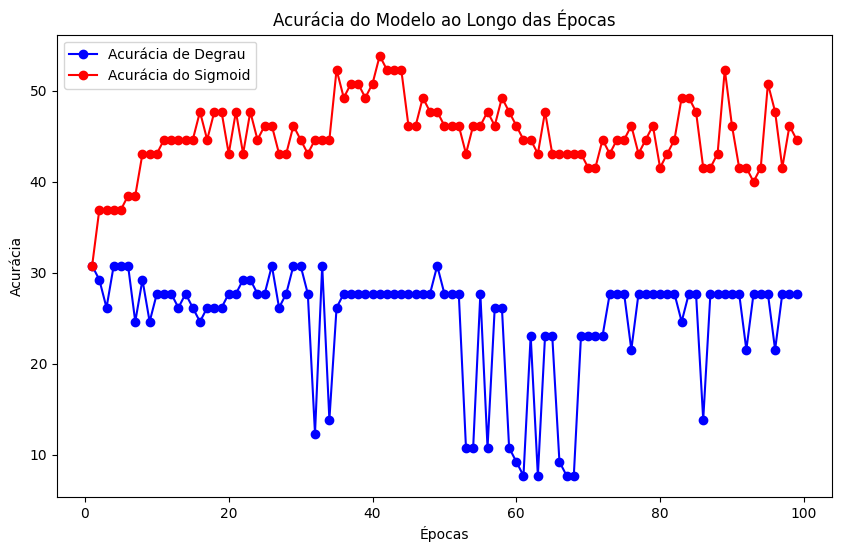

In [14]:
import matplotlib.pyplot as plt

acc_degrau = []
acc_sigmoid = []

for epochs in range(1, 100):
    glass_perceptron = Perceptron(epochs, alpha, X_train_normalized, y_train.__array__(), n)
    glass_perceptron.start_training()
    
    glass_sigmoid = Perceptron(epochs, alpha, X_train_normalized, y_train.__array__(), n)
    glass_sigmoid.start_training(True)
    
    acc_degrau.append(glass_perceptron.start_test(X_test_normalized, y_test.__array__()))
    acc_sigmoid.append(glass_sigmoid.start_test(X_test_normalized, y_test.__array__(), True))

#Plotar o gráfico
epochs = range(1, 100)

plt.figure(figsize=(10, 6))

# Corrige o uso de epochs para ser uma lista
plt.plot(epochs, acc_degrau, 'bo-', label='Acurácia de Degrau')
plt.plot(epochs, acc_sigmoid, 'ro-', label='Acurácia do Sigmoid')

plt.title('Acurácia do Modelo ao Longo das Épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')

plt.legend()

plt.show()

